In [1]:
using Distributions
using StatsPlots

function plot_tstat(;
        n = 10,
        L = 10^5,
        dist = Normal(1, 2),
        xlim = (-5, 5),
        xtick = -5:5,
        bin = range(extrema(xtick)...; length=51),
    )
    tstat(sample) = (mean(sample) - mean(dist))/√(var(sample)/n)
    T = [tstat(rand(dist, n)) for _ in 1:L]
    histogram(T; norm=true, alpha=0.3, label="(x - μ)/√(u²/n)", xlim, xtick, bin)
    plot!(TDist(n-1); lw=1.5, label="Tdist(n - 1)")
    diststr = replace("$dist", r"\{.*\}"=>"")
    title!("$diststr,  n = $n"; titlefontsize=10)
end

function plot_chisqstat(;
        n = 10,
        L = 10^5,
        dist = Normal(1, 2),
        xlim = (-1, 3n),
        xtick = 0:(n÷2):3n,
        bin = range(extrema(xtick)...; length=51),
    )
    X = (n-1)*[var(rand(dist, n)) for _ in 1:L]/var(dist)
    histogram(X; norm=true, alpha=0.3, label="(n - 1)u²/σ²", xlim, xtick, bin)
    plot!(Chisq(n-1); lw=1.5, label="Chisq(n - 1)")
    diststr = replace("$dist", r"\{.*\}"=>"")
    title!("$diststr,  n = $n"; titlefontsize=10)
end

function plot_both(;
        n = 10,
        L = 10^5,
        dist = Normal(1, 2),
        xlim1 = (-5, 5),
        xtick1 = -5:5,
        xlim2 = (-1, 3n),
        xtick2 = 0:(n÷2):3n,
        bin1 = range(extrema(xtick1)...; length=51),
        bin2 = range(extrema(xtick2)...; length=51),
    )
    P = plot_tstat(; n, L, dist, xlim=xlim1, xtick=xtick1, bin=bin1)
    Q = plot_chisqstat(; n, L, dist, xlim=xlim2, xtick=xtick2, bin=bin2)
    plot(P, Q; size=(800, 300))
end

plot_both (generic function with 1 method)

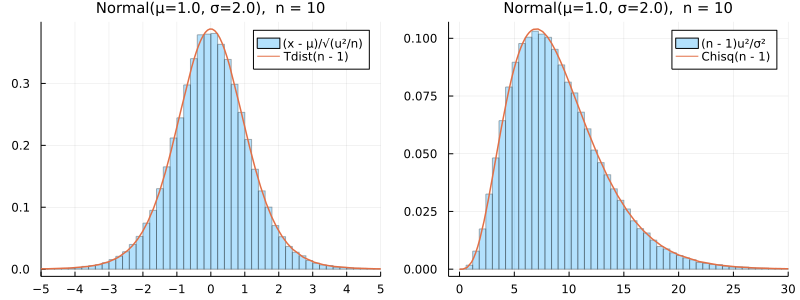

In [2]:
plot_both()

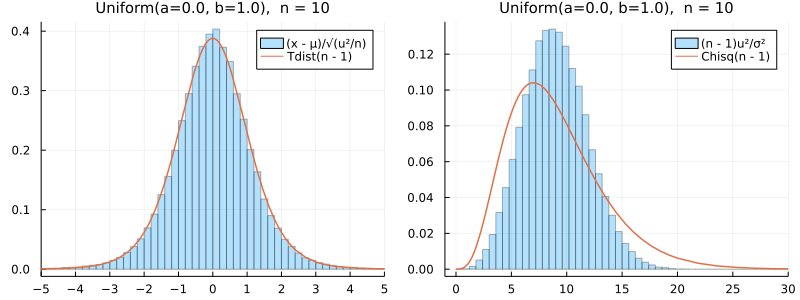

In [3]:
plot_both(dist = Uniform(0, 1))

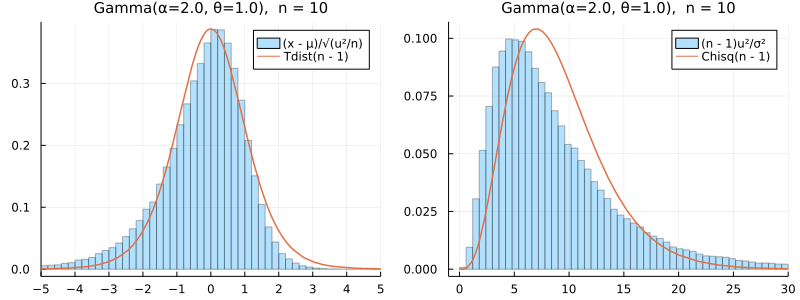

In [4]:
plot_both(dist = Gamma(2, 1))

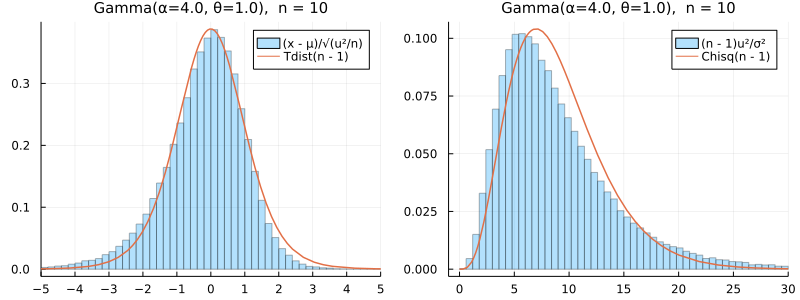

In [5]:
plot_both(dist = Gamma(4, 1))

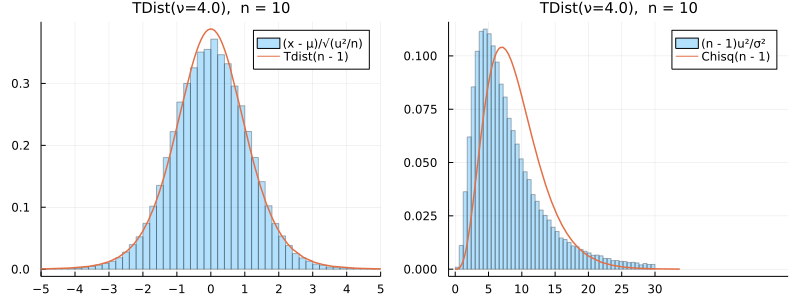

In [6]:
plot_both(dist = TDist(4); xlim2=(-1, 50))

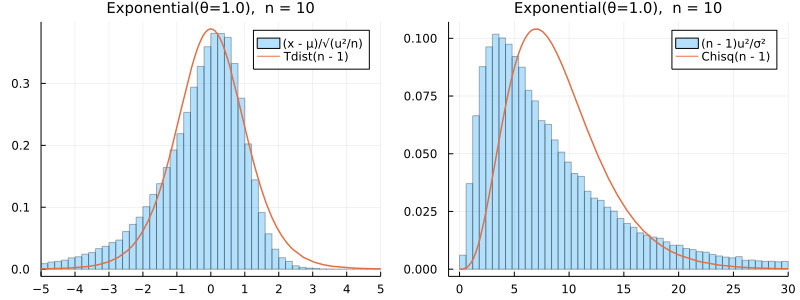

In [7]:
plot_both(dist = Exponential())

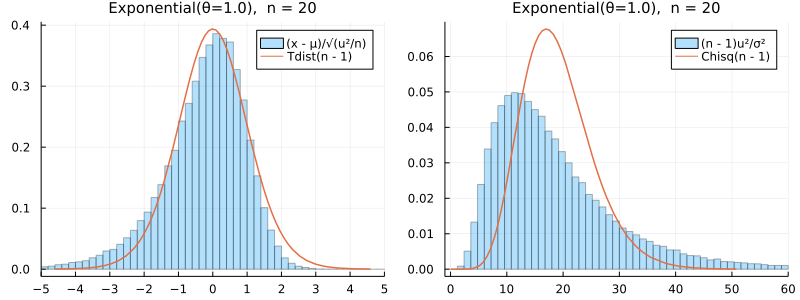

In [8]:
plot_both(dist = Exponential(), n = 20)

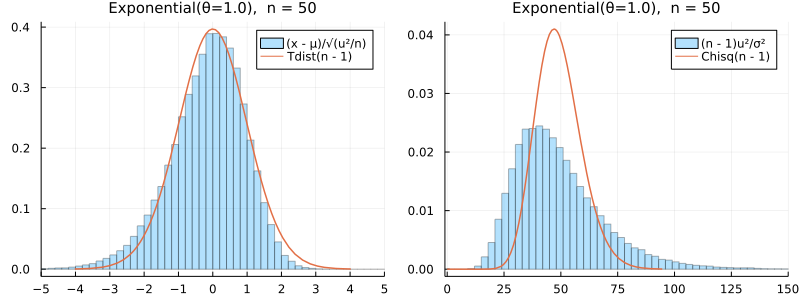

In [9]:
plot_both(dist = Exponential(), n = 50)

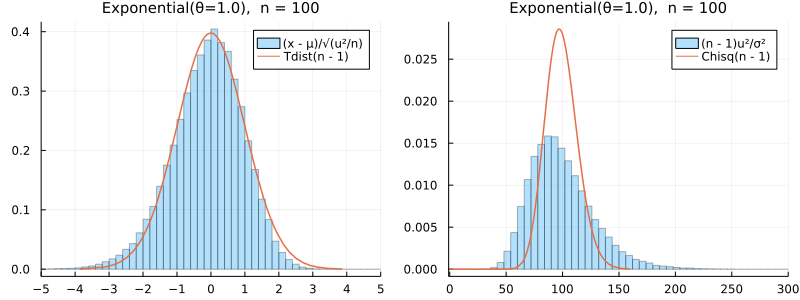

In [10]:
plot_both(dist = Exponential(), n = 100)

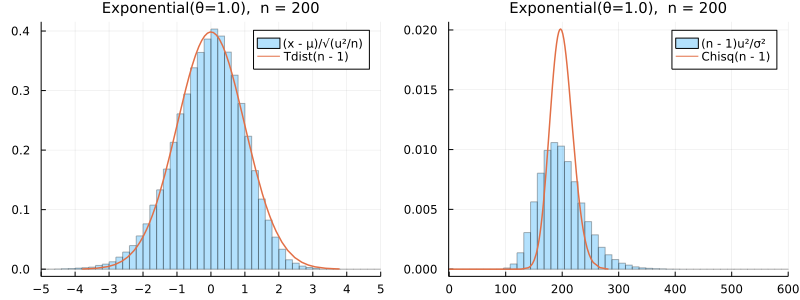

In [11]:
plot_both(dist = Exponential(), n = 200)

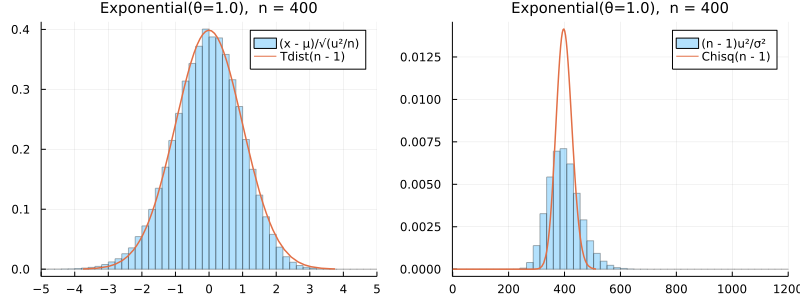

In [12]:
plot_both(dist = Exponential(), n = 400)